# House Price Prediction

This dataset provides comprehensive information for house price prediction, with 13 column names:

Price: The price of the house.<br>
Area: The total area of the house in square feet.<br>
Bedrooms: The number of bedrooms in the house.<br>
Bathrooms: The number of bathrooms in the house.<br>
Stories: The number of stories in the house.<br>
Mainroad: Whether the house is connected to the main road (Yes/No).<br>
Guestroom: Whether the house has a guest room (Yes/No).<br>
Basement: Whether the house has a basement (Yes/No).<br>
Hot water heating: Whether the house has a hot water heating system (Yes/No).<br>
Airconditioning: Whether the house has an air conditioning system (Yes/No).<br>
Parking: The number of parking spaces available within the house.<br>
Prefarea: Whether the house is located in a preferred area (Yes/No).<br>
Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).<br>

In [1]:
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load dataset
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Step 3: Initial Exploration :
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Step 4 : Data Preprocessing
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Their is no null values and unique values

In [7]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
maping={'furnished':2,'semi-furnished':1,'unfurnished':0}

df['furnishingstatus']=df['furnishingstatus'].map(maping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,2


In [9]:
# We need to do label encoding for categorical variables
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])       #yes=1, No = 0
df['guestroom'] = le.fit_transform(df['guestroom']) #yes=1, No = 0
df['basement'] = le.fit_transform(df['basement']) #yes=1, No = 0
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating']) #yes=1, No = 0
df['airconditioning'] = le.fit_transform(df['airconditioning']) #yes=1, No = 0
df['prefarea'] = le.fit_transform(df['prefarea']) #yes=1, No = 0
#df['furnishingstatus'] = le.fit_transform(df['furnishingstatus']) #Furnished=2, Semi-Furnished=1, Unfurnished=0
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [10]:
#Checking the dataset is Imbalanced 
df['price'].value_counts()
df['furnishingstatus'].value_counts()

furnishingstatus
1    227
0    178
2    140
Name: count, dtype: int64

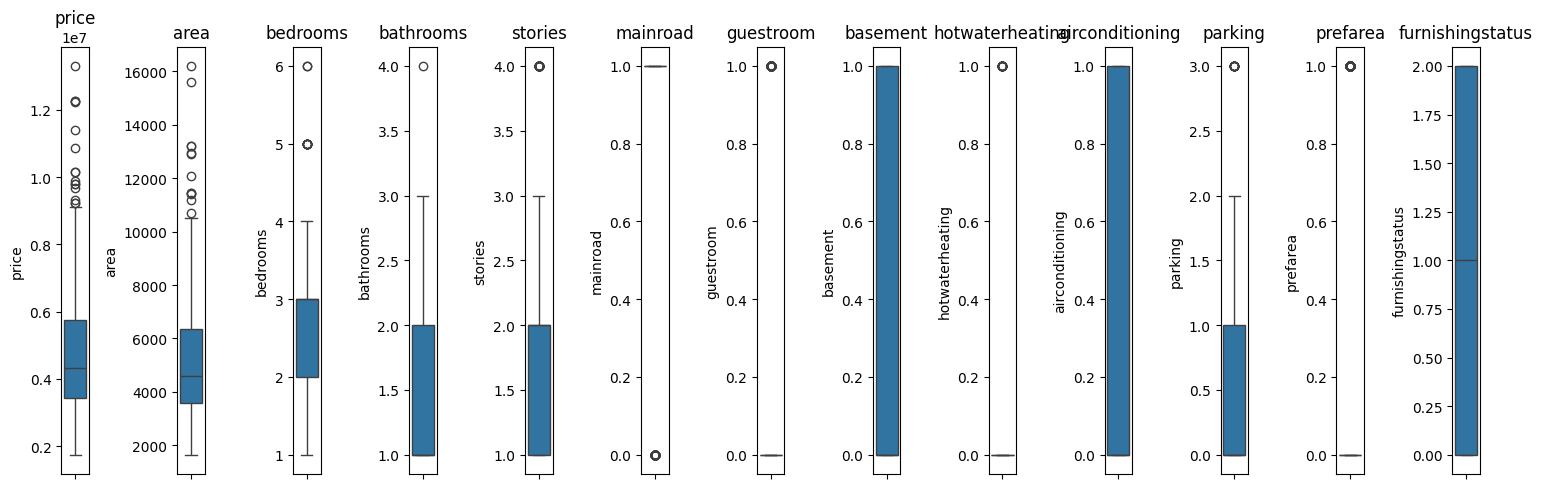

In [11]:
def boxplot(df):

    fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

    for i, col in enumerate(df.columns):

        sns.boxplot(y=df[col],ax=axs[i])

        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

boxplot(df)

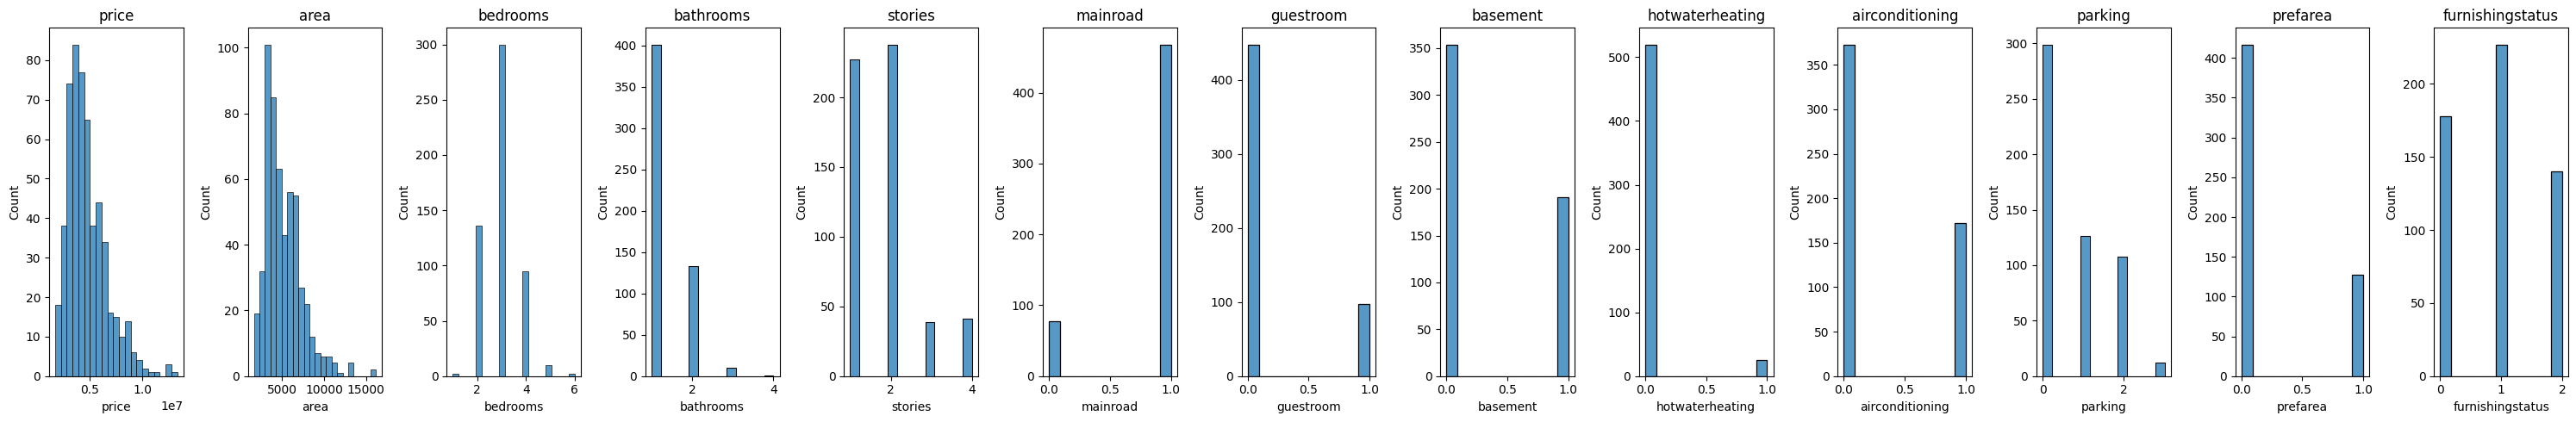

In [12]:
def histplot(df):

    fig,axs=plt.subplots(ncols=len(df.columns), figsize=(30,5))

    for i,col in enumerate(df.columns):

        sns.histplot(df[col],ax=axs[i])

        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

histplot(df)

price ,area have right skewness, bars at top are much away ,indicate outlier

bedroom,bathrooms,stories have some value much higher than other , outlier ,remember to check rows with 6-5 bedrooms, 4 bathrooms and 4 stories

mainroad,guestroom,basement,hotwater,ac,prefarea show much data not having much of these facilities so we will check how these affect target variable and if affect is minimal we drop them

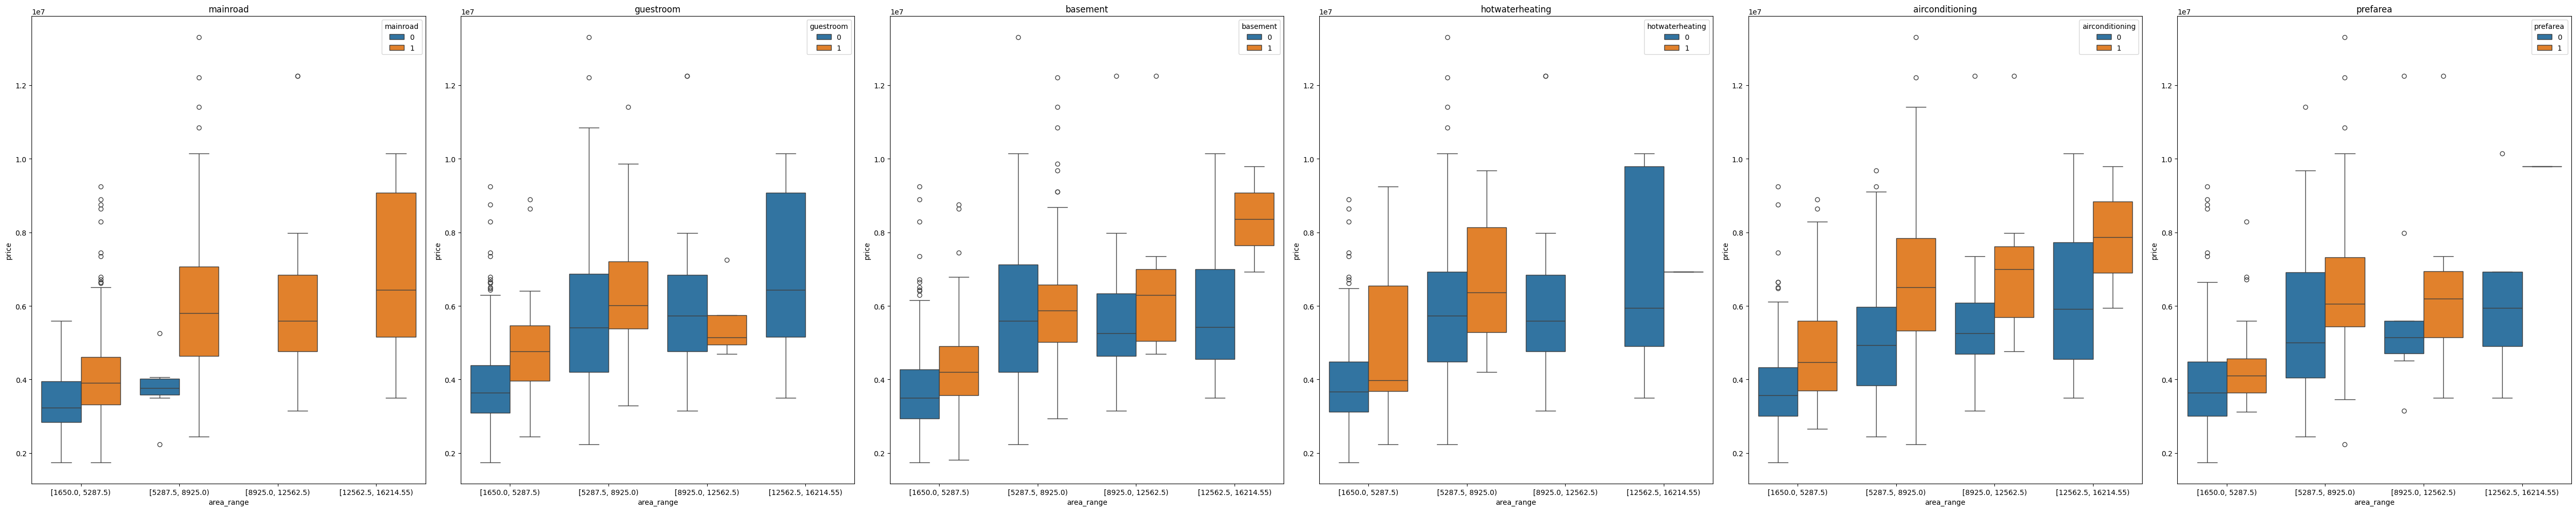

In [13]:
# lets see price diff for each area range in case of 0's and 1's in extra features

cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#bins=[1000,2000,3000,4000,5000,7000,9000,12000]

#df['area_range']=pd.(df['area'],right=False)
df['area_range'] = pd.cut(df['area'], bins=4, right=False)

fig,axs=plt.subplots(ncols=len(cols),figsize=(50,10))

for i,col in enumerate(cols):

    sns.boxplot(data=df,x='area_range',y='price',hue=col,ax=axs[i])

    axs[i].set_title(col)

plt.tight_layout()

plt.show()

df=df.drop(columns=['area_range'])

<Axes: >

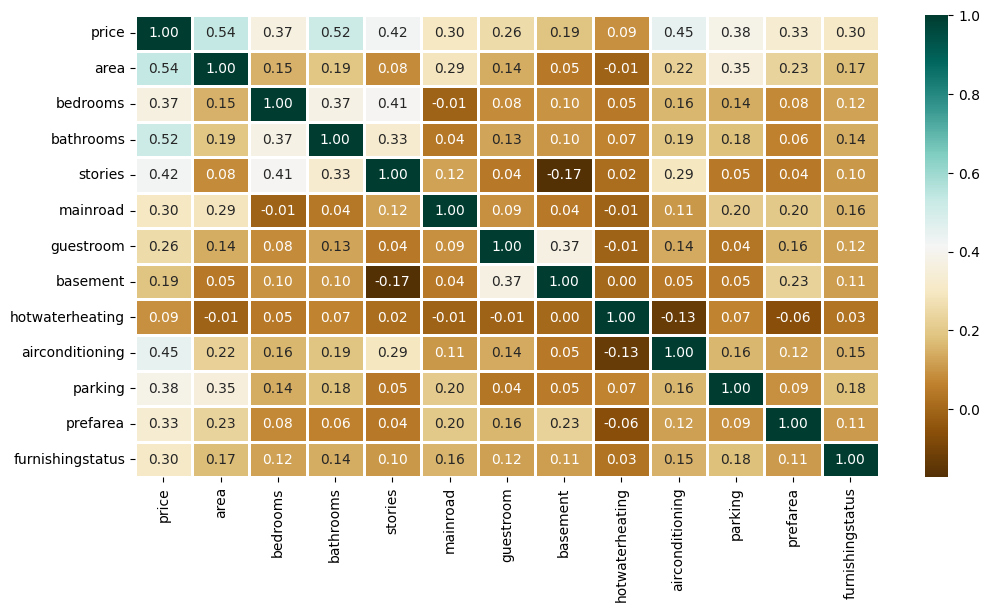

In [14]:
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [15]:
df=df.drop(columns=['hotwaterheating'])

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,2


In [17]:
# first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

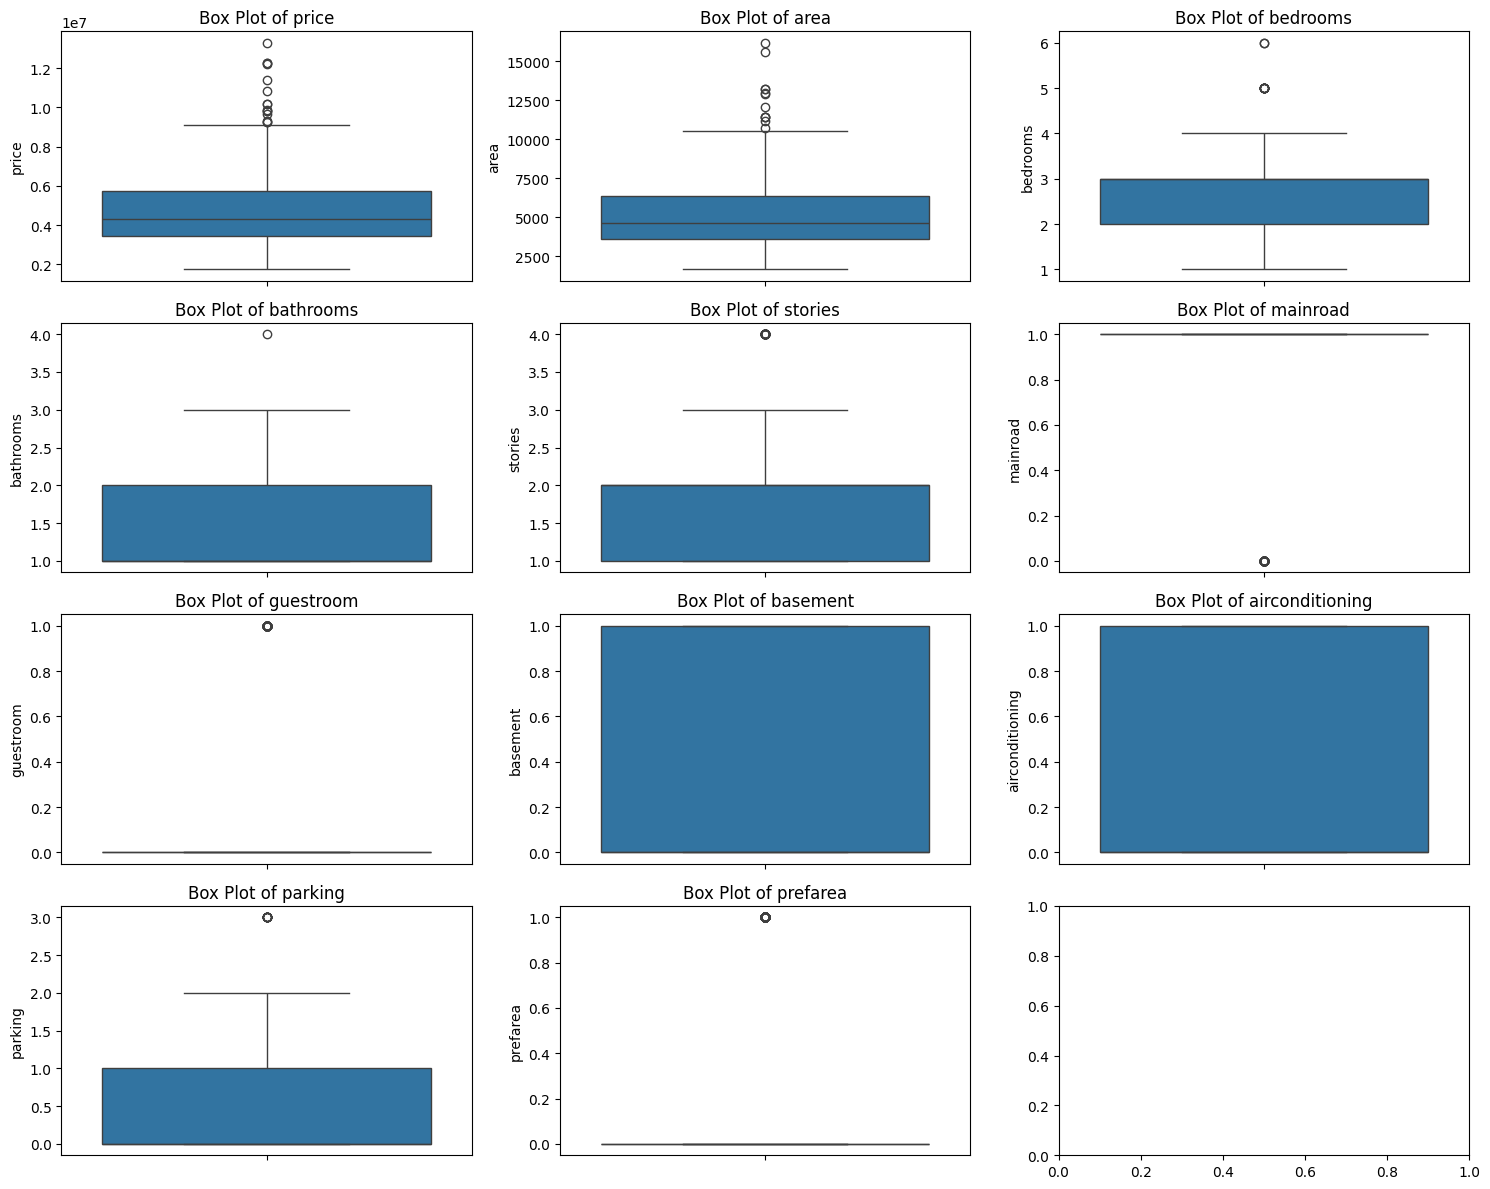

In [18]:
show_boxplots(df)

<Axes: >

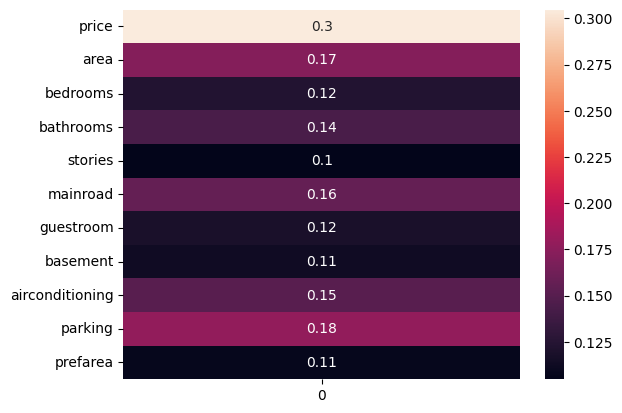

In [19]:
corr=df.corr().iloc[:-1,-1]

sns.heatmap(corr.values.reshape(-1,1),annot=True,yticklabels=corr.index)

In [20]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [21]:
# Outliers are in 4 columns, we can get them using the following method
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count
         
        
    return outliers_count

In [22]:
outliers = get_outliers_count(df)
outliers
# You can verify these in the plot as well

{'price': 15,
 'area': 12,
 'bedrooms': 12,
 'bathrooms': 1,
 'stories': 41,
 'mainroad': 77,
 'guestroom': 97,
 'basement': 0,
 'airconditioning': 0,
 'parking': 12,
 'prefarea': 128}

## We can remove the outliers by imputing theri values with MEDIAN

In [23]:
df.shape

(545, 12)

In [24]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()
            
            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [25]:
df = impute_outliers_with_median(df, outliers)

In [26]:
get_outliers_count(df)

{'price': 5,
 'area': 6,
 'bedrooms': 0,
 'bathrooms': 1,
 'stories': 0,
 'mainroad': 0,
 'guestroom': 0,
 'basement': 0,
 'airconditioning': 0,
 'parking': 0,
 'prefarea': 0}

In [27]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [28]:
# For printing the outliers
outl = find_outliers_IQR(df["price"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 5
max outlier value: 9100000.0
min outlier value: 8855000.0


15    9100000.0
16    9100000.0
17    8960000.0
18    8890000.0
19    8855000.0
Name: price, dtype: float64

In [29]:
df = df.drop(outl.index)

In [30]:
outl = find_outliers_IQR(df["area"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 7
max outlier value: 10500.0
min outlier value: 9960.0


2       9960.0
82     10500.0
142    10500.0
146    10500.0
171    10269.0
224    10240.0
277    10360.0
Name: area, dtype: float64

In [31]:
df = df.drop(outl.index)

In [32]:
# outliers = get_outliers_count(df)
# outliers

# Checking for correlation

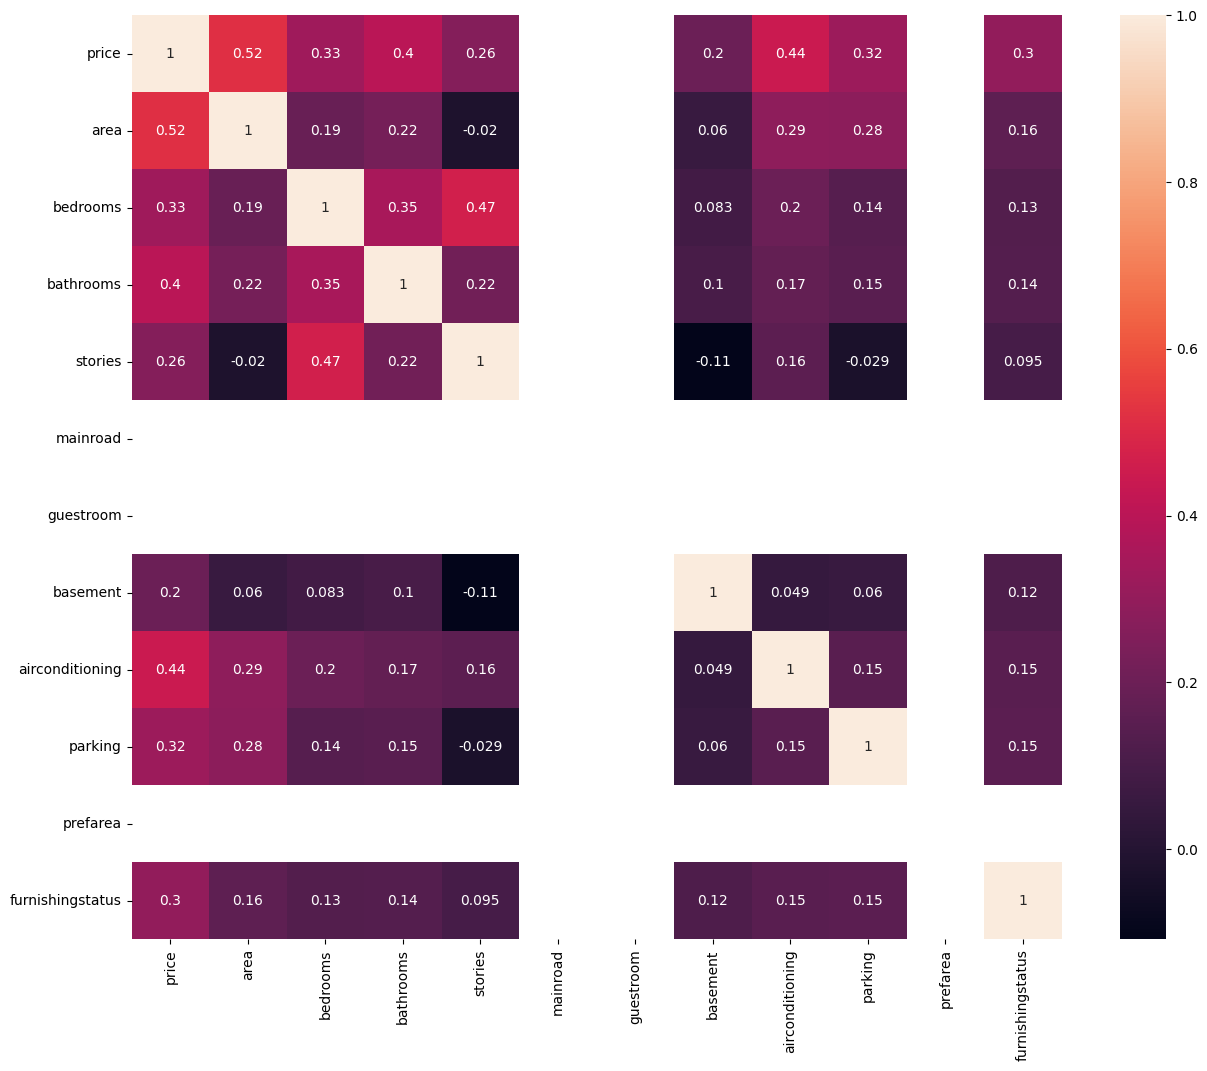

In [33]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.show()

# Training

In [34]:
X=df.drop('price',axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
#linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lre = LinearRegression()
lre.fit(X_train,Y_train)
Y_pred = lre.predict(X_test)
Y_pred_train = lre.predict(X_train)
print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
print(f"R² score: {r2_score(Y_test, Y_pred)}")

MAE: 856923.9176531307
MSE: 1214553673356.902
R² score: 0.5378518115421358


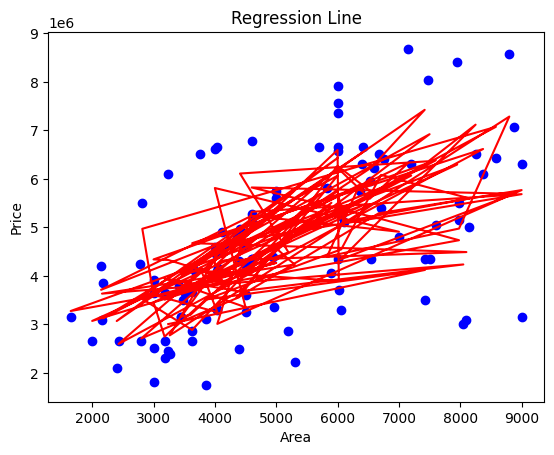

In [40]:
#Plot Regression Line & Interpret Coefficients
plt.scatter(X_test['area'], Y_test, color='blue')
plt.plot(X_test['area'], lre.predict(X_test), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line')
plt.show()

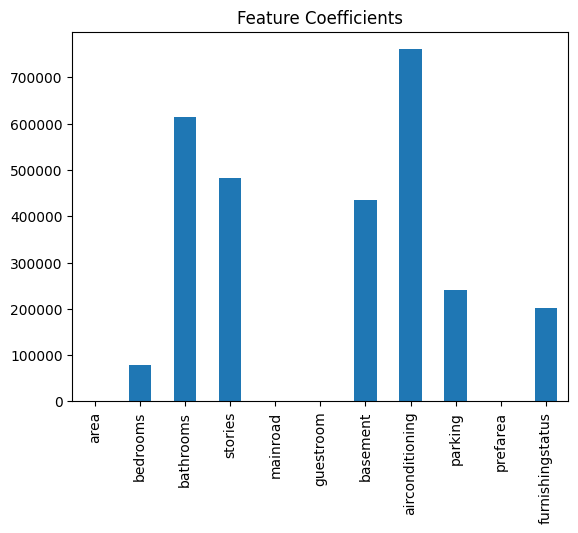

In [41]:
coefficients = pd.Series(lre.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title('Feature Coefficients')
plt.show()